# Introduction to Generative Modeling

심층 신경망은 주로 지도 학습(분류 또는 회귀)에 사용됩니다. 그러나 Generative Adversarial Networks 또는 GAN은 매우 다른 목적을 위해 신경망을 사용합니다. 생성 모델링

> 생성 모델링은 머신러닝의 비지도 학습 작업으로, 모델을 사용하여 원래 데이터 세트에서 그럴듯하게 끌어낼 수 있는 새로운 예를 생성하거나 출력할 수 있는 방식으로 입력 데이터의 규칙성 또는 패턴을 자동으로 발견하고 학습하는 작업을 포함합니다. . - [출처](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)

생성 모델의 힘을 알아보려면 [thispersondoesnotexist.com](https://thispersondoesnotexist.com)을 방문하세요. 페이지를 다시 로드할 때마다 사람 얼굴의 새로운 이미지가 즉석에서 생성됩니다. 결과는 매우 흥미롭습니다.

<img src="https://imgix.bustle.com/inverse/4b/17/8f/0e/cf91/4506/99c7/e6a491c5d4ac/these-people-are-not-real--they-were-produced-by-our-generator-that-allows-control-over-different-a.png" style="width:480px; margin-bottom:32px"/>

생성 모델링에 사용되는 많은 접근 방식이 있지만 Generative Adversarial Network는 다음과 같은 접근 방식을 취합니다.

<img src="https://i.imgur.com/6NMdO9u.png" style="width:420px; margin-bottom:32px"/>

*생성자(Generator)* 와 *판별자(Discriminator)* 의 두 가지 신경망이 있습니다. 생성자는 랜덤 벡터/매트릭스가 주어진 "가짜" 샘플을 생성하고 판별기는 주어진 샘플이 "진짜"(훈련 데이터에서 선택) 또는 "가짜"(생성자에서 생성)인지 감지하려고 시도합니다. 훈련은 동시에 진행됩니다. 판별자를 몇 epoch 동안 학습한 다음 생성자를 몇 epoch 동안 학습하고 반복합니다. 이렇게 하면 생성자와 판별자가 작업을 더 잘 수행할 수 있습니다.

그러나 GAN은 훈련하기가 매우 어려울 수 있으며 하이퍼파라미터, 활성화 함수 및 정규화에 매우 민감합니다. 이 튜토리얼에서는 GAN을 훈련시켜 애니메이션 캐릭터의 얼굴 이미지를 생성합니다.

<img src="https://i.imgur.com/NaKtJs0.png" width="360" style="margin-bottom:32px"/>


63,000개 이상의 잘린 애니메이션 얼굴로 구성된 [Anime Face Dataset](https://github.com/Mckinsey666/Anime-Face-Dataset)를 사용하겠습니다. 생성 모델링은 무감독 학습 작업이므로 이미지에 레이블이 없습니다. 이 튜토리얼에 있는 대부분의 코드는 [이 노트북](https://www.kaggle.com/splcher/starter-anime-face-dataset)을 기반으로 합니다.

----------------------------------------------------------------------------------------------------------------------------------------

## 데이터 다운로드 및 탐색

[`opendatasets`](https://github.com/JovianML/opendatasets) 라이브러리를 사용하여 Kaggle에서 [dataset](https://www.kaggle.com/splcher/animefacedataset)를 다운로드할 수 있습니다. `opendatasets`는 Kaggle에서 데이터세트를 다운로드하기 위해 [Kaggle 공식 API](https://github.com/Kaggle/kaggle-api)를 사용합니다. API credentials 을 찾으려면 다음 단계를 따르세요.

1. [https://kaggle.com/](https://kaggle.com)에 로그인한 후 오른쪽 상단의 프로필 사진을 클릭하고 메뉴에서 "내 계정"을 선택합니다.

2. "API" 섹션까지 아래로 스크롤하고 "새 API 토큰 만들기"를 클릭합니다. 그러면 다음 내용이 포함된 `kaggle.json` 파일이 다운로드됩니다.

```
{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}
```

3. `opendatsets.download`를 실행하면 2단계에서 다운로드한 파일에서 얻을 수 있는 사용자 이름 및 Kaggle API를 입력하라는 메시지가 표시됩니다.

`kaggle.json` 파일은 한 번만 다운로드하면 됩니다. Google Colab에서 파일 탭을 사용하여 `kaggle.json` 파일을 업로드할 수도 있으며 자격 증명이 자동으로 읽혀집니다.

In [3]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/splcher/animefacedataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sie777
Your Kaggle Key: ········


  0%|          | 0.00/395M [00:00<?, ?B/s]

100%|██████████| 395M/395M [00:25<00:00, 16.2MB/s] 


데이터 세트에는 JPG 형식의 63,000개 이상의 이미지가 모두 포함된 'images'라는 단일 폴더가 있습니다.

In [2]:
import os

DATA_DIR = './animefacedataset'
print(os.listdir(DATA_DIR))

['images']


In [3]:
print(os.listdir(DATA_DIR + '/images')[:10])

['0_2000.jpg', '10000_2004.jpg', '10001_2004.jpg', '10002_2004.jpg', '10003_2004.jpg', '10004_2004.jpg', '10005_2004.jpg', '10006_2004.jpg', '10007_2004.jpg', '10008_2004.jpg']


In [4]:
os.listdir(DATA_DIR +'/images')[0]

'0_2000.jpg'

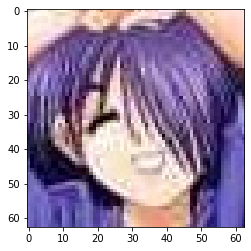

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

img_test = img.imread('./animefacedataset/images/0_2000.jpg')
plt.imshow(img_test)
plt.show()

torchvision에서 ImageFolder 클래스를 사용하여 이 데이터 세트를 로드해 보겠습니다. 또한 이미지의 크기를 조정하고 64x64픽셀로 자르고 픽셀 값을 각 채널의 평균 및 표준 편차 0.5로 정규화합니다. 이렇게 하면 픽셀 값이 (-1, 1) 범위에 있게 되어 판별자를 훈련하는 데 더 편리합니다. 또한 데이터를 배치로 로드하는 데이터 로더를 생성합니다.

In [10]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [11]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [13]:
train_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

이미지 텐서를 비정규화하고 훈련 배치에서 일부 샘플 이미지를 표시하는 도우미 함수를 만들어 보겠습니다.

In [15]:
import torch
from torchvision.utils import make_grid

In [16]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    
def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

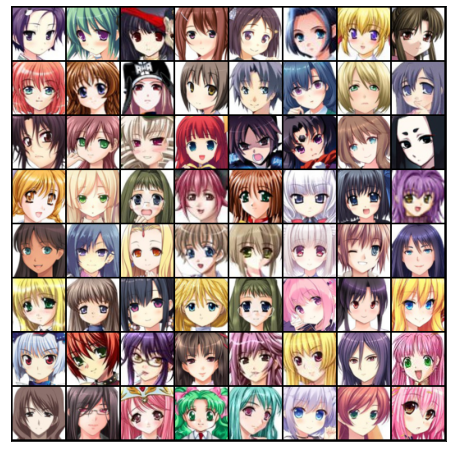

In [17]:
show_batch(train_dl)

----------------------------------------------------------------------------------------------------------------------------------------

## GPU 사용

GPU를 원활하게 사용하기 위해 사용 가능한 경우 몇 가지 도우미 함수(get_default_device 및 to_device)와 도우미 클래스 DeviceDataLoader를 정의하여 모델 및 데이터를 GPU로 이동합니다(사용 가능한 경우).

In [36]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

이 노트북을 실행하는 위치에 따라 기본 장치는 CPU(torch.device('cpu')) 또는 GPU(torch.device('cuda'))일 수 있습니다.

In [20]:
device = get_default_device()
device

device(type='cuda')

이제 데이터 배치를 GPU(사용 가능한 경우)로 자동 전송하기 위해 'DeviceDataLoader'를 사용하여 학습 데이터 로더를 이동할 수 있습니다.

In [21]:
train_dl = DeviceDataLoader(train_dl, device)

----------------------------------------------------------------------------------------------------------------------------------------

## Discriminator Network

Discriminator는 이미지를 입력으로 받아 "실제" 또는 "생성"으로 분류하려고 합니다. 이런 의미에서 다른 신경망과 같습니다. 모든 이미지에 대해 단일 숫자 출력을 출력하는 CNN(컨볼루션 신경망)을 사용합니다. 출력 특징 맵의 크기를 점진적으로 줄이기 위해 stride 2를 사용합니다.

![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd.gif)

In [23]:
import torch.nn as nn

discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

판별자에 대해 Leaky ReLU 활성화를 사용하고 있습니다.

<img src="https://cdn-images-1.medium.com/max/1600/1*ypsvQH7kvtI2BhzR2eT_Sw.png" width="420">


> 일반 ReLU 함수와 달리 Leaky ReLU는 음수 값에 대해 작은 기울기 신호를 전달할 수 있습니다. 결과적으로 Discriminator에서 Generator로 유입되는 Gradient가 더 강해집니다. 역전파 패스에서 기울기(기울기) 0을 전달하는 대신 작은 음수 기울기를 전달합니다. - [출처](https://sthalles.github.io/advanced_gans/)

다른 이진 분류 모델과 마찬가지로 판별기의 출력은 0과 1 사이의 단일 숫자이며, 이는 입력 이미지가 실제일 확률, 즉 원본 데이터 세트에서 선택한 확률로 해석될 수 있습니다.

판별기 모델을 선택한 장치로 이동해 보겠습니다.

In [24]:
discriminator = to_device(discriminator, device)

----------------------------------------------------------------------------------------------------------------------------------------

## Generator Network

생성기에 대한 입력은 일반적으로 이미지 생성을 위한 시드로 사용되는 벡터 또는 난수 행렬(잠재 텐서라고 함)입니다. 생성기는 '(128, 1, 1)' 모양의 잠재 텐서를 '3 x 64 x 64' 모양의 이미지 텐서로 변환합니다. 이를 달성하기 위해 PyTorch의 `ConvTranspose2d` 레이어를 사용할 것입니다. 이 레이어는 *transposed convolution* 으로 수행됩니다. [자세히 알아보기](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md#transposed-convolution-animations)

![](https://i.imgur.com/DRvK546.gif)

In [25]:
latent_size = 128

generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

생성기의 출력 레이어에 TanH 활성화 함수를 사용합니다.

<img src="https://nic.schraudolph.org/teach/NNcourse/figs/tanh.gif" width="420" >

> "Tanh 함수를 사용하는 출력 레이어를 제외하고, 생성기에서 ReLU 활성화(Nair & Hinton, 2010)가 사용됩니다. 한정된(bounded) 활성화를 사용하면 모델이 더 빨리 색상을 포화시키고 덮는 것을 학습할 수 있음을 관찰했습니다. 훈련 분포의 공간. 판별기 내에서 우리는 leaky ReLU 활성화(Maas et al., 2013)(Xu et al., 2015)가 특히 고해상도 모델링에서 잘 작동한다는 것을 발견했습니다." - [출처](https://stackoverflow.com/questions/41489907/generative-adversarial-networks-tanh)


TanH 활성화의 출력이 `[-1,1]` 범위에 있기 때문에 학습 데이터 세트의 이미지에 유사한 변환을 적용했습니다. 생성기를 사용하여 몇 가지 출력을 생성하고 출력을 변환하고 비정규화하여 이미지로 봅시다.


torch.Size([128, 3, 64, 64])


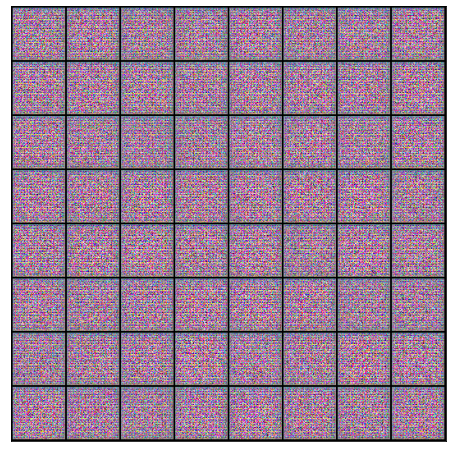

In [26]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

예상할 수 있듯이 생성기의 출력은 아직 훈련하지 않았기 때문에 기본적으로 무작위 노이즈입니다.

생성자를 선택한 장치로 이동합시다.

In [27]:
generator = to_device(generator, device)

----------------------------------------------------------------------------------------------------------------------------------------

## 판별자 훈련

판별자는 이진 분류 모델이므로 이진 교차 엔트로피 손실 함수를 사용하여 실제 이미지와 생성된 이미지를 얼마나 잘 구분할 수 있는지 정량화할 수 있습니다.

<img src="https://image.slidesharecdn.com/chrishokamp-dublinnlp3-160805110319/95/task-based-learning-for-nlp-going-beyond-cross-entropy-chris-hokamp-10-638.jpg?cb=1470395213" width="420" >

In [28]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()

    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_preds = discriminator(fake_images)
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

다음은 discriminator 훈련과 관련된 단계입니다.

    ＊ 이미지가 실제 MNIST 데이터 세트에서 선택된 경우 discriminator가 1을 출력하고, 생성 네트워크를 사용하여 생성된 경우 0을 출력할 것으로 예상합니다.
    ＊ 먼저 실제 이미지 배치를 전달하고 대상 레이블을 1로 설정하여 손실을 계산합니다.
    ＊ 그런 다음 생성기를 사용하여 생성된 가짜 이미지 배치를 판별기로 전달하고 대상 레이블을 0으로 설정하여 손실을 계산합니다.
    ＊ 마지막으로 두 손실을 더하고 전체 손실을 사용하여 판별자의 가중치를 조정하기 위해 경사 하강법을 수행합니다.

판별기를 훈련하는 동안 생성기 모델의 가중치를 변경하지 않는다는 점에 유의하는 것이 중요합니다(opt_d는 discriminator.parameters()에만 영향을 미칩니다).

----------------------------------------------------------------------------------------------------------------------------------------

## Generator Training

생성기의 출력은 이미지이므로 생성기를 어떻게 훈련시킬 수 있는지 명확하지 않습니다. 여기서 우리는 판별자를 손실 함수의 일부로 사용하는 다소 우아한 트릭을 사용합니다. 작동 방식은 다음과 같습니다.

- 생성기를 사용하여 이미지 배치를 생성하고 판별기로 전달합니다.

- 목표 레이블을 1, 즉 진짜(real) 값으로 설정하여 손실을 계산합니다. 제너레이터의 목적이 판별자를 "속이는 것"이기 때문에 이렇게 합니다.

- 우리는 손실을 사용하여 경사하강법을 수행합니다.

이것이 코드에서 어떻게 보이는지 보여줍니다.

In [29]:
def train_generator(opt_g):
    # Clear generator gradients
    opt_g.zero_grad()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # Update generator weights
    loss.backward()
    opt_g.step()
    
    return loss.item()

모델의 진행 상황을 시각적으로 검사하기 위해 생성기의 중간 출력을 저장할 수 있는 디렉터리를 생성해 보겠습니다. 또한 생성된 이미지를 내보내는 도우미 함수를 만듭니다.

In [30]:
from torchvision.utils import save_image

sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

생성기에 고정된 입력 벡터 집합을 사용하여 모델을 훈련할 때 개별적으로 생성된 이미지가 시간이 지남에 따라 어떻게 진화하는지 확인합니다. 모델 교육을 시작하기 전에 한 세트의 이미지를 저장해 보겠습니다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving generated-images-0000.png


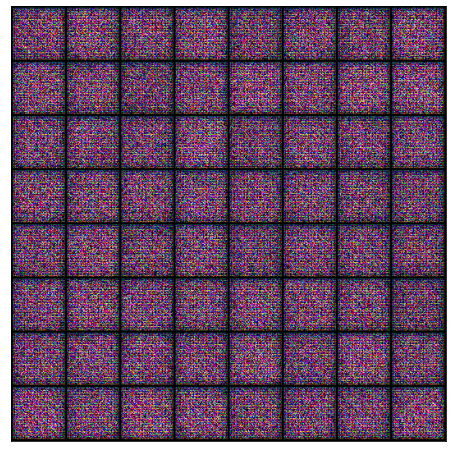

In [31]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)

save_samples(0, fixed_latent)

----------------------------------------------------------------------------------------------------------------------------------------

## Full Training Loop

학습 데이터의 각 배치에 대해 판별자와 생성자를 나란히 학습시키는 'fit' 함수를 정의해 보겠습니다. GAN에서 잘 작동하는 것으로 알려진 일부 사용자 정의 매개변수(베타)와 함께 Adam 옵티마이저를 사용할 것입니다. 또한 검사를 위해 일부 샘플 생성 이미지를 정기적으로 저장합니다.

<img src="https://i.imgur.com/6NMdO9u.png" style="max-width:420px; margin-bottom:32px"/>

In [32]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [33]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(opt_g)
            
        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

이제 모델을 훈련할 준비가 되었습니다. 다른 학습 속도를 시도하여 생성자 훈련과 판별자 훈련 사이의 균형을 잘 유지할 수 있는지 확인하십시오.

In [34]:
lr = 0.0002
epochs = 25

In [ ]:
history = fit(epochs, lr)


Epoch [1/25], loss_g: 6.5466, loss_d: 0.3188, real_score: 0.7766, fake_score: 0.0134
Saving generated-images-0001.png



Epoch [2/25], loss_g: 9.4679, loss_d: 0.8041, real_score: 0.9537, fake_score: 0.4880
Saving generated-images-0002.png



Epoch [3/25], loss_g: 5.1011, loss_d: 0.2923, real_score: 0.8212, fake_score: 0.0599
Saving generated-images-0003.png



Epoch [4/25], loss_g: 8.9456, loss_d: 0.4373, real_score: 0.9193, fake_score: 0.2727
Saving generated-images-0004.png



Epoch [5/25], loss_g: 12.2288, loss_d: 0.6934, real_score: 0.9754, fake_score: 0.4259
Saving generated-images-0005.png



Epoch [6/25], loss_g: 6.3508, loss_d: 0.0823, real_score: 0.9670, fake_score: 0.0442
Saving generated-images-0006.png



Epoch [7/25], loss_g: 5.8612, loss_d: 0.1762, real_score: 0.8901, fake_score: 0.0054
Saving generated-images-0007.png



Epoch [8/25], loss_g: 8.2021, loss_d: 0.2079, real_score: 0.9792, fake_score: 0.1577
Saving generated-images-0008.png



Epoch [9/25], loss_g: 6.0505, loss_d: 0.1261, real_score: 0.9501, fake_score: 0.0663
Saving generated-images-0009.png



Epoch [10/25], loss_g: 8.4463, loss_d: 0.1783, real_score: 0.9993, fake_score: 0.1429
Saving generated-images-0010.png



Epoch [11/25], loss_g: 4.8760, loss_d: 0.1476, real_score: 0.9202, fake_score: 0.0342
Saving generated-images-0011.png



Epoch [12/25], loss_g: 4.8470, loss_d: 0.1874, real_score: 0.8701, fake_score: 0.0071
Saving generated-images-0012.png



Epoch [13/25], loss_g: 7.3859, loss_d: 0.2132, real_score: 0.8653, fake_score: 0.0002
Saving generated-images-0013.png



Epoch [14/25], loss_g: 9.6649, loss_d: 0.1541, real_score: 0.8857, fake_score: 0.0003
Saving generated-images-0014.png


In [ ]:
losses_g, losses_d, real_scores, fake_scores = history

이제 모델을 교육했으므로 체크포인트를 저장할 수 있습니다.

In [ ]:
# Save the model checkpoints 
torch.save(generator.state_dict(), 'G.pth')
torch.save(discriminator.state_dict(), 'D.pth')

다음은 1차, 5차, 10차 훈련 후 생성된 이미지의 모습입니다.

In [ ]:
from IPython.display import Image

Image('./generated/generated-images-0001.png')

In [ ]:
Image('./generated/generated-images-0005.png')

In [ ]:
Image('./generated/generated-images-0010.png')

In [ ]:
Image('./generated/generated-images-0020.png')

In [ ]:
Image('./generated/generated-images-0025.png')

OpenCV를 사용하여 각 에포크 후에 생성된 샘플 이미지를 비디오로 결합하여 훈련 과정을 시각화할 수 있습니다.

In [ ]:
import cv2
import os

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'generated' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 1, (530,530))
[out.write(cv2.imread(fname)) for fname in files]
out.release()

시간 경과에 따라 손실이 어떻게 변하는지 시각화할 수도 있습니다. 시각화 loss는 학습 프로세스를 디버깅하는 데 매우 유용합니다. GAN의 경우 판별기의 손실이 너무 높아지지 않으면서 생성기의 손실이 시간이 지남에 따라 감소할 것으로 예상합니다.

In [ ]:
import imageio
imageio.mimsave('gans_training.gif', [cv2.imread(fname) for fname in files], fps=3)

In [ ]:
Image('./gans_training.gif')

In [ ]:
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');